# Assignment 6: Apply NB

<ol>
    <li><strong>Apply Multinomial NB on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    </li>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li></li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
        </ul>
    </li>
    <li>
fine the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using absolute values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print their corresponding feature names
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
###
def read_csv(file_name):
    data = pd.read_csv(file_name)
    return data

In [5]:
ppcsd_df = read_csv("preprocessed_data.csv")
ppcsd_df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [4]:
### borrowed from AppliedAI
def stack_plot(data, category, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved {}'.format(category))
    plt.xticks(ind, list(data[xtick].values),rotation=45)
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [5]:
### borrowed from AppliedAI
def univariate_barplots(data, col1, category, col2='project_is_approved', top=False):
    # Count number of ones in dataframe python
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()
    
    print(temp.head(5))
    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    print(temp.head(5))
    stack_plot(temp, category, xtick=col1, col2=col2, col3='total')
    print("="*50)
    print(temp.tail(5))

In [6]:
univariate_barplots(ppcsd_df, 'school_state', 'state wise', 'project_is_approved', False)

  school_state  project_is_approved
0           ak                  290
1           al                 1506
2           ar                  872
3           az                 1800
4           ca                13205


SpecificationError: nested renamer is not supported

  teacher_prefix  project_is_approved  total       Avg
2            mrs                49000  57272  0.855566
3             ms                32860  38955  0.843537
1             mr                 8960  10648  0.841473
4        teacher                 1877   2360  0.795339
0             dr                    9     13  0.692308


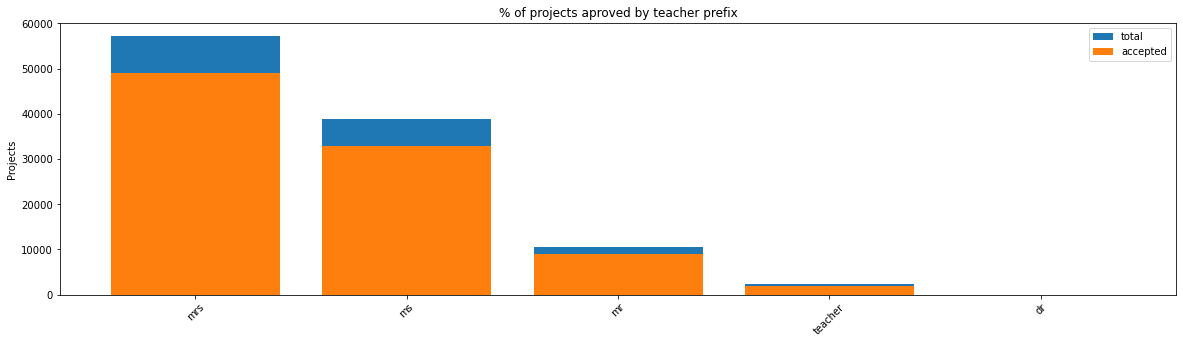

  teacher_prefix  project_is_approved  total       Avg
2            mrs                49000  57272  0.855566
3             ms                32860  38955  0.843537
1             mr                 8960  10648  0.841473
4        teacher                 1877   2360  0.795339
0             dr                    9     13  0.692308


In [7]:
univariate_barplots(ppcsd_df, 'teacher_prefix', 'by teacher prefix', 'project_is_approved', False)

  project_grade_category  project_is_approved  total       Avg
3          grades_prek_2                37536  44225  0.848751
0             grades_3_5                31729  37137  0.854377
1             grades_6_8                14258  16923  0.842522
2            grades_9_12                 9183  10963  0.837636


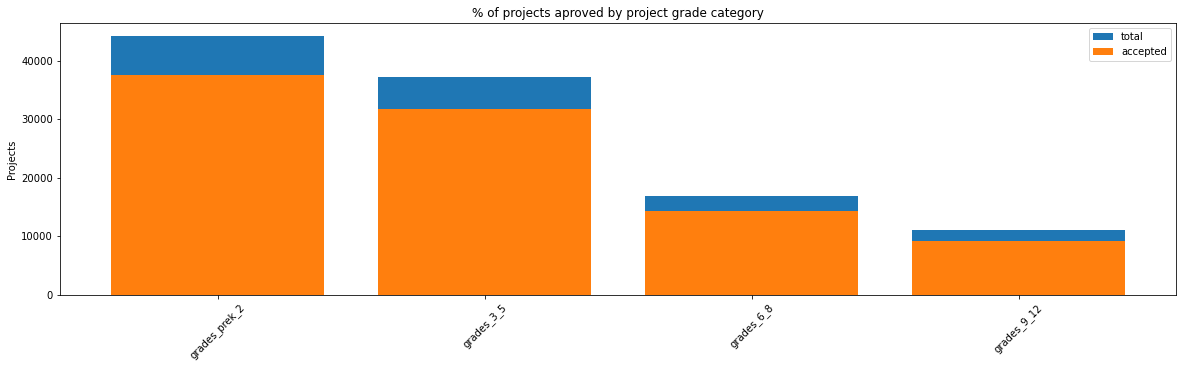

  project_grade_category  project_is_approved  total       Avg
3          grades_prek_2                37536  44225  0.848751
0             grades_3_5                31729  37137  0.854377
1             grades_6_8                14258  16923  0.842522
2            grades_9_12                 9183  10963  0.837636


In [8]:
univariate_barplots(ppcsd_df, 'project_grade_category', 'by project grade category', 'project_is_approved', False)

                  clean_categories  project_is_approved  total       Avg
24               literacy_language                20520  23655  0.867470
32                    math_science                13991  17072  0.819529
28  literacy_language math_science                12725  14636  0.869432
8                    health_sports                 8640  10177  0.848973
40                      music_arts                 4429   5180  0.855019


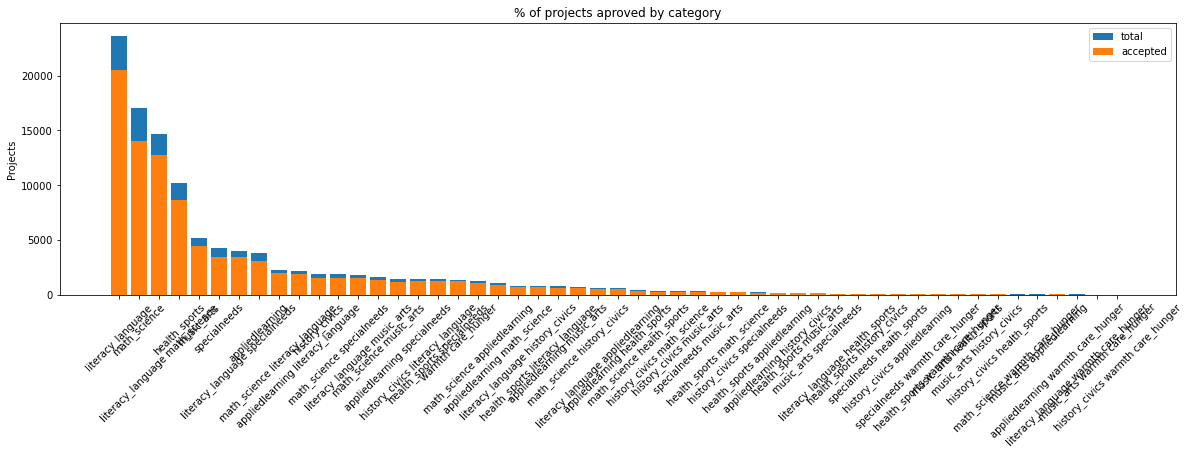

                        clean_categories  project_is_approved  total       Avg
41            music_arts appliedlearning                    7     10  0.700000
7     appliedlearning warmth care_hunger                    8     10  0.800000
31  literacy_language warmth care_hunger                    7      9  0.777778
45         music_arts warmth care_hunger                    1      2  0.500000
23     history_civics warmth care_hunger                    0      1  0.000000


In [9]:
univariate_barplots(ppcsd_df, 'clean_categories', 'by category', 'project_is_approved', False)

In [10]:
### plot PDF for teacher_number_of_previously_posted_projects for columns 1 and 0

def plot_PDF (data, col1, col2='project_is_approved'):
    
    import seaborn as sns
    temp_approved     = data[data[col2] == 1][col1]
    temp_not_approved = data[data[col2] == 0][col1]
    
    # Reset default params
    sns.set(rc={"font.size":10,"axes.labelsize":10})
    fig, ax = plt.subplots(figsize=(20,10))
    sns.distplot(temp_approved,label='Approved',color='blue')
    sns.distplot(temp_not_approved,label='Not Approved',color='green')
    ax.legend()

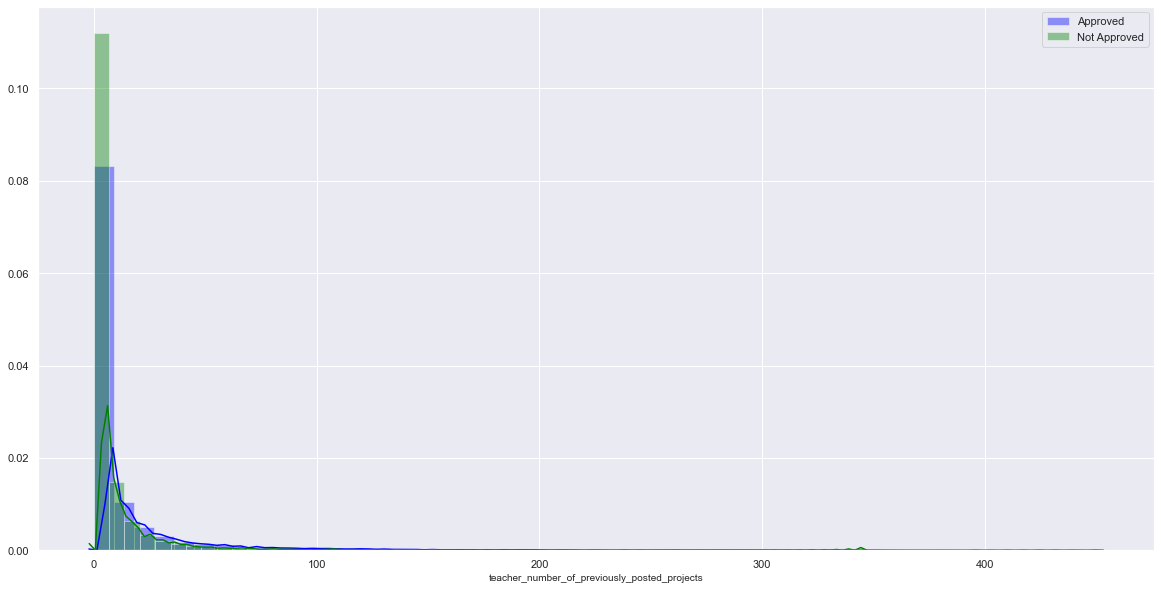

In [11]:
plot_PDF(ppcsd_df,col1='teacher_number_of_previously_posted_projects',col2='project_is_approved')

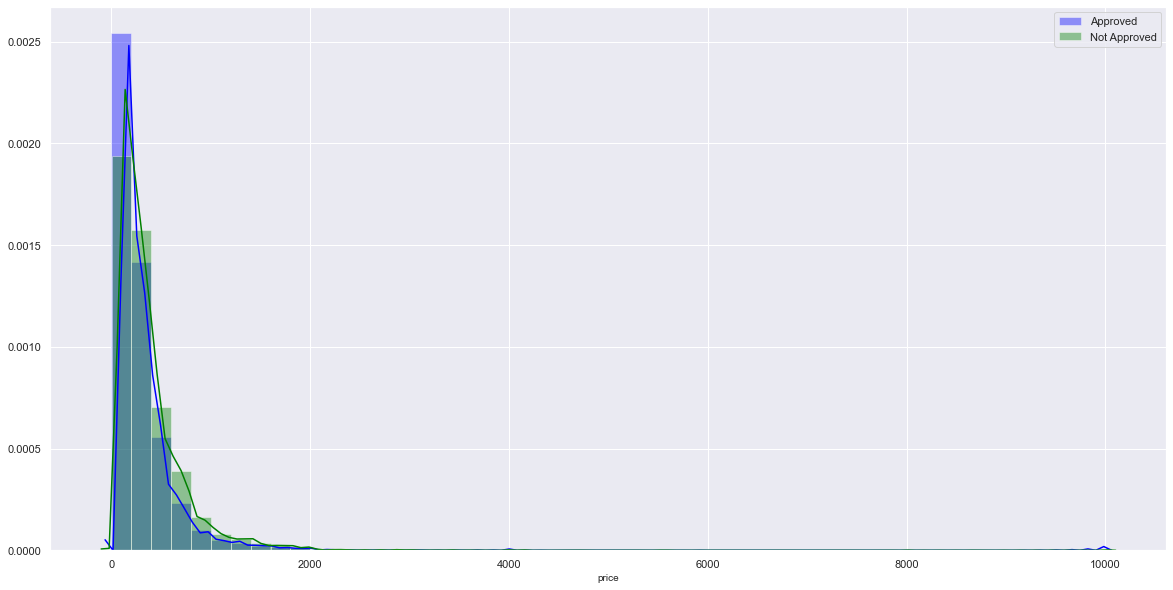

In [12]:
plot_PDF(ppcsd_df,col1='price',col2='project_is_approved')

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [6]:
### Essay Preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

def lem_stop_word(essay_str):
    
    lemmatizer = WordNetLemmatizer() 
    tokens = word_tokenize(essay_str)
    new_token = []
    for word in tokens:
          new_token.append(lemmatizer.lemmatize(word,pos='v'))
    return(" ".join(new_token))
    new_token.clear()
    

ppcsd_df['essay'] = ppcsd_df['essay'].apply(lem_stop_word)

counts of label 'Approved': 69530
counts of label 'Not Approved': 12406 

Ratio of Aprroved to Not Approved :5.604546187328712
----------------------------------------------------------------------------------------------------


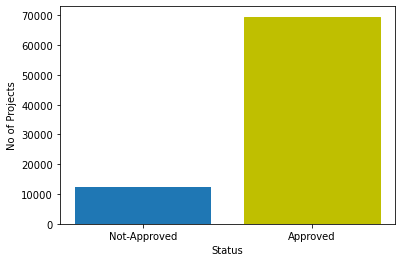

In [7]:
## Import required library 
from sklearn.model_selection import train_test_split

## create dependent and independent varaible
y_df = ppcsd_df['project_is_approved'].values
X_df = ppcsd_df.drop('project_is_approved',axis=1)

## create train,test split 
X_tr,X_test,y_tr,y_test = train_test_split(X_df, y_df, test_size=0.25, random_state=42,stratify=y_df)

### check number of approved and not approved data in train file 
print("counts of label 'Approved': {}".format(sum(y_tr == 1))) 
print("counts of label 'Not Approved': {} \n".format(sum(y_tr == 0)))
print("Ratio of Aprroved to Not Approved :{}".format((sum(y_tr == 1)/sum(y_tr == 0))))
##
print("-"*100)
temp=np.unique(y_tr,return_counts=True)
temp = pd.Series(temp[1],index=temp[0])
ind = np.arange(len(temp))
fig, ax = plt.subplots()
ax.bar(ind, temp)
ax.set_ylabel('No of Projects')
ax.set_xlabel('Status')
ax.set_xticks(ind)
ax.set_xticklabels(['Not-Approved','Approved'])
ax.get_children()[1].set_color('y')

For each 5 approved project, we have one not approved project. It seems our data is imbalanced. I am going to use SMOTE to upscale them

In [8]:
print("Total number of unique states is {}".format(X_tr['school_state'].nunique()))
print("Total number of unique prefix is {}".format(X_tr['teacher_prefix'].nunique()))
print("Total number of unique project_grade_category is {}".format(X_tr['project_grade_category'].nunique()))
print("Total number of unique clean_categories is {}".format(X_tr['clean_categories'].nunique()))

Total number of unique states is 51
Total number of unique prefix is 5
Total number of unique project_grade_category is 4
Total number of unique clean_categories is 51


In [16]:
"""## reference "https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02"
pr_df = X_tr.groupby('school_state')['project_is_approved'].mean()
pr_df = pd.DataFrame(pr_df)
pr_df = pr_df.rename(columns = {'project_is_approved':'Approved_Project'})
pr_df['Not_Approved_Project'] = 1 - pr_df['Approved_Project']
pr_df['PR_State'] = pr_df['Approved_Project']/pr_df['Not_Approved_Project']
pr_df.reset_index(inplace=True,drop=False)
pr_df.head()
### Map Train CV and Test Data
## I beleive in this case there will be no data leakage for our model, as i have trained my model only on my Training Data ???

X_tr = X_tr.merge(pr_df,left_on='school_state',right_on='school_state',how='inner')
X_test = X_test.merge(pr_df,left_on='school_state',right_on='school_state',how='inner')

X_tr_pr_state   = X_tr['PR_State']
X_test_pr_state = X_test['PR_State']"""

'## reference "https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02"\npr_df = X_tr.groupby(\'school_state\')[\'project_is_approved\'].mean()\npr_df = pd.DataFrame(pr_df)\npr_df = pr_df.rename(columns = {\'project_is_approved\':\'Approved_Project\'})\npr_df[\'Not_Approved_Project\'] = 1 - pr_df[\'Approved_Project\']\npr_df[\'PR_State\'] = pr_df[\'Approved_Project\']/pr_df[\'Not_Approved_Project\']\npr_df.reset_index(inplace=True,drop=False)\npr_df.head()\n### Map Train CV and Test Data\n## I beleive in this case there will be no data leakage for our model, as i have trained my model only on my Training Data ???\n\nX_tr = X_tr.merge(pr_df,left_on=\'school_state\',right_on=\'school_state\',how=\'inner\')\nX_test = X_test.merge(pr_df,left_on=\'school_state\',right_on=\'school_state\',how=\'inner\')\n\nX_tr_pr_state   = X_tr[\'PR_State\']\nX_test_pr_state = X_test[\'PR_State\']'

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [10]:
def one_hot_encoding(X_tr, y_tr, X_test, y_test, col_name):
    vectorizer = CountVectorizer()
    vectorizer.fit(X_tr[col_name].values) # fit has to happen only on train data

    # we use the fitted CountVectorizer to convert the text to vector
    X_tr_ohe = vectorizer.transform(X_tr[col_name].values)
    X_test_ohe = vectorizer.transform(X_test[col_name].values)

    print("After vectorizations {}".format(col_name))
    print(X_tr_ohe.shape, y_tr.shape)
    print(X_test_ohe.shape, y_test.shape)
    print(vectorizer.get_feature_names())
    print("="*100)
    
    return X_tr_ohe, X_test_ohe, vectorizer.get_feature_names()

In [11]:
X_tr_state_ohe, X_test_state_ohe, state_feature_name = one_hot_encoding(X_tr, y_tr, X_test, y_test, 'school_state')

After vectorizations school_state
(81936, 51) (81936,)
(27312, 51) (27312,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [12]:
X_tr_pgc_ohe, X_test_pgc_ohe, pgc_feature_name = one_hot_encoding(X_tr, y_tr, X_test, y_test, 'project_grade_category')

After vectorizations project_grade_category
(81936, 4) (81936,)
(27312, 4) (27312,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [13]:
X_tr_tpr_ohe, X_test_tpr_ohe, tp_feature_name = one_hot_encoding(X_tr, y_tr, X_test, y_test, 'teacher_prefix')
print(len(tp_feature_name))

After vectorizations teacher_prefix
(81936, 5) (81936,)
(27312, 5) (27312,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
5


In [14]:
X_tr_cln_catg_ohe, X_test_cln_catg_ohe, cln_cat_feature_name = one_hot_encoding(X_tr, y_tr, X_test, y_test, 'clean_categories') 

After vectorizations clean_categories
(81936, 9) (81936,)
(27312, 9) (27312,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


In [15]:
X_tr_cln_sub_catg_ohe, X_test_cln_sub_catg_ohe, cln_sub_catg_feature_name = one_hot_encoding(X_tr, y_tr, X_test, y_test, 'clean_subcategories')

After vectorizations clean_subcategories
(81936, 30) (81936,)
(27312, 30) (27312,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


In [16]:
def BOW_essays_sub(X_tr, y_tr, X_test, y_test, col_name = 'essay'):
    
    vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
    vectorizer.fit(X_tr[col_name].values) # fit has to happen only on train data

    # we use the fitted CountVectorizer to convert the text to vector
    X_tr_ohe = vectorizer.transform(X_tr[col_name].values)
    X_test_ohe = vectorizer.transform(X_test[col_name].values)

    print("After vectorizations {}".format(col_name))
    print(X_tr_ohe.shape, y_tr.shape)
    print(X_test_ohe.shape, y_test.shape)
    #print(vectorizer.get_feature_names())
    print("="*100)
    
    return X_tr_ohe, X_test_ohe, vectorizer.get_feature_names()

In [17]:
X_tr_essay_BOW, X_test_essay_BOW, BOW_feature_name = BOW_essays_sub(X_tr, y_tr, X_test, y_test, 'essay')

After vectorizations essay
(81936, 5000) (81936,)
(27312, 5000) (27312,)


In [18]:
### Normalize your data 
def norm_data(X_tr, y_tr, X_test, y_test, col_name = 'price'):
    
    from sklearn.preprocessing import Normalizer
    normalizer = Normalizer()

    normalizer.fit(X_tr['price'].values.reshape(1,-1))

    X_tr_norm = normalizer.transform(X_tr['price'].values.reshape(-1,1))
    X_test_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))


    print("After vectorizations")
    print(X_tr_norm.shape, y_tr.shape)
    print(X_test_norm.shape, y_test.shape)
    print("="*100)
    return X_tr_norm,X_test_norm

In [19]:
X_tr_price_norm, X_test_price_norm = norm_data(X_tr, y_tr, X_test, y_test, 'price')

After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


In [20]:
X_tr_nopp_norm, X_test_nopp_norm = norm_data(X_tr, y_tr, X_test, y_test, 'teacher_number_of_previously_posted_project')

After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


## BagOfWords Implementation

In [21]:
## prepare your data set to train your model
from scipy.sparse import hstack
X_tr_BOW_csr = hstack((X_tr_essay_BOW,X_tr_state_ohe, X_tr_pgc_ohe, X_tr_tpr_ohe, X_tr_cln_catg_ohe,X_tr_cln_sub_catg_ohe,X_tr_nopp_norm,X_tr_price_norm)).tocsr()
X_test_BOW_csr = hstack((X_test_essay_BOW,X_test_state_ohe, X_test_pgc_ohe, X_test_tpr_ohe, X_test_cln_catg_ohe,X_test_cln_sub_catg_ohe,X_test_nopp_norm,X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_BOW_csr.shape, y_tr.shape)
print(X_test_BOW_csr.shape, y_test.shape)
print("="*100)

Final Data matrix
(81936, 5101) (81936,)
(27312, 5101) (27312,)


In [30]:
##perform SMOTE
"""def over_sample(X_tr_csr,y_tr):
    
    from imblearn.over_sampling import SMOTE
    oversample = SMOTE()
    X_tr_csr, y_tr = oversample.fit_resample(X_tr_csr, y_tr)
    
    print("counts of label 'Approved': {}".format(sum(y_tr == 1))) 
    print("counts of label 'Not Approved': {} \n".format(sum(y_tr == 0)))
    print("Ratio of Aprroved to Not Approved :{}".format((sum(y_tr == 1)/sum(y_tr == 0))))
    print("-"*100)
    
    temp=np.unique(y_tr,return_counts=True)
    temp = pd.Series(temp[1],index=temp[0])
    ind = np.arange(len(temp))
    plt.figure(figsize=(16, 4))
    fig, ax = plt.subplots()
    
    ax.bar(ind, temp)
    ax.set_ylabel('No of Projects')
    ax.set_xlabel('Status')
    ax.set_xticks(ind)
    plt.title('Approved Vs Not Approved After SMOTE')
    ax.set_xticklabels(['Not-Approved','Approved'])
    ax.get_children()[1].set_color('y')
    return X_tr_csr,y_tr"""

'def over_sample(X_tr_csr,y_tr):\n    \n    from imblearn.over_sampling import SMOTE\n    oversample = SMOTE()\n    X_tr_csr, y_tr = oversample.fit_resample(X_tr_csr, y_tr)\n    \n    print("counts of label \'Approved\': {}".format(sum(y_tr == 1))) \n    print("counts of label \'Not Approved\': {} \n".format(sum(y_tr == 0)))\n    print("Ratio of Aprroved to Not Approved :{}".format((sum(y_tr == 1)/sum(y_tr == 0))))\n    print("-"*100)\n    \n    temp=np.unique(y_tr,return_counts=True)\n    temp = pd.Series(temp[1],index=temp[0])\n    ind = np.arange(len(temp))\n    plt.figure(figsize=(16, 4))\n    fig, ax = plt.subplots()\n    \n    ax.bar(ind, temp)\n    ax.set_ylabel(\'No of Projects\')\n    ax.set_xlabel(\'Status\')\n    ax.set_xticks(ind)\n    plt.title(\'Approved Vs Not Approved After SMOTE\')\n    ax.set_xticklabels([\'Not-Approved\',\'Approved\'])\n    ax.get_children()[1].set_color(\'y\')\n    return X_tr_csr,y_tr'

In [31]:
### check number of approved and not approved data in train file 
### X_tr_BOW_csr_1, y_tr_BOW_csr = over_sample(X_tr_BOW_csr,y_tr)

In [32]:
def multi_nomial_NB(X_tr_csr,y_tr):
    from sklearn.model_selection import GridSearchCV
    from sklearn.naive_bayes import MultinomialNB

    parameters = {'alpha':[0.001, 0.001, 0.01, 0.1,0.5,1,5, 10,50, 100,500, 1000]}

    clf = MultinomialNB(class_prior=[0.5,0.5])
    gs_clf = GridSearchCV(clf, parameters, cv=7, scoring='roc_auc',return_train_score=True)
    gs_clf.fit(X_tr_csr, y_tr)
    
    best_parameters = gs_clf.best_estimator_.get_params()
    results = pd.DataFrame.from_dict(gs_clf.cv_results_)
    train_auc= results['mean_train_score']
    train_auc_std= results['std_train_score']
    cv_auc = results['mean_test_score'] 
    cv_auc_std= results['std_test_score']
    alpha = results['param_alpha']
    
    
    plt.figure(figsize=None)
    plt.plot(alpha, train_auc, label='Train AUC')
    plt.plot(alpha, cv_auc, label='CV AUC')
    plt.scatter(alpha, train_auc, label='Train Results')
    plt.scatter(alpha, cv_auc, label='CV Results')
    plt.legend()
    plt.xscale("log")
    plt.xlabel("Alpha: hyperparameter")
    plt.ylabel("Mean Result")
    plt.title("Hyper parameter Tuning")
    plt.grid()
    plt.show()
    return results, best_parameters

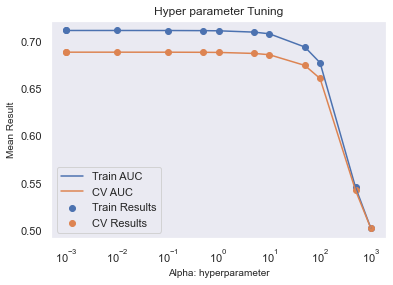

In [33]:
results, best_parameters = multi_nomial_NB(X_tr_BOW_csr,y_tr)

#### HyperParameter Tuning (BOW Implementation)

In [34]:
print("{}{}".format(results['mean_test_score'],results['mean_train_score']))

0     0.688549
1     0.688549
2     0.688547
3     0.688525
4     0.688420
5     0.688289
6     0.687223
7     0.685860
8     0.674554
9     0.660691
10    0.542328
11    0.502267
Name: mean_test_score, dtype: float640     0.711519
1     0.711519
2     0.711516
3     0.711484
4     0.711344
5     0.711171
6     0.709779
7     0.708025
8     0.694038
9     0.677377
10    0.545564
11    0.502393
Name: mean_train_score, dtype: float64


In [35]:
alpha_bow = best_parameters['alpha']
alpha_bow

0.001

#### ROC-AUC Curve (BOW Implementation)

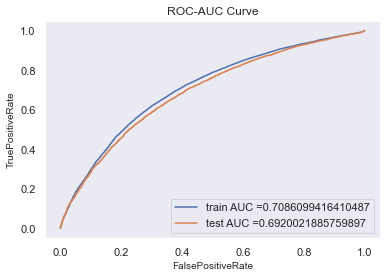

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB

clf_mnb= MultinomialNB(alpha=alpha_bow)
clf_mnb.fit(X_tr_BOW_csr,y_tr)

y_train_pred = clf_mnb.predict_proba(X_tr_BOW_csr)[::,1]    
y_test_pred =  clf_mnb.predict_proba(X_test_BOW_csr)[::,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_tr, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
auc_bow_train = auc(train_fpr, train_tpr)
auc_bow_test = auc(test_fpr, test_tpr)
### feature importance


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc_bow_train))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc_bow_test))
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title("ROC-AUC Curve")
plt.grid()
plt.show()

In [37]:
### find best threshold
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

#### Confusion Matrix (BOW Implementation)

the maximum value of tpr*(1-fpr) 0.4345743914849477 for threshold 0.844


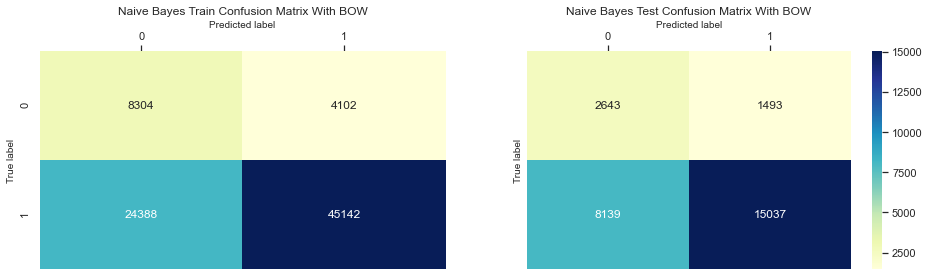

In [38]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
train_conf_mat = pd.DataFrame(confusion_matrix(y_tr, predict_with_best_t(y_train_pred, best_t)))
test_conf_mat = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

fig, axs = plt.subplots(1,2,figsize=(16, 4),sharey=True)
sns.set(font_scale=1)
f1 = sns.heatmap(train_conf_mat, annot=True,fmt="d", ax=axs[0], cbar = False ,cmap= "YlGnBu") 

f1.set_title('Naive Bayes Train Confusion Matrix With BOW')
f1.set_ylabel('True label')
f1.set_xlabel('Predicted label')
f1.xaxis.set_ticks_position('top')
f1.xaxis.set_label_position('top')

f2 = sns.heatmap(test_conf_mat, annot=True, fmt = 'd', ax=axs[1] , cmap = "YlGnBu") 
f2.set_title('Naive Bayes Test Confusion Matrix With BOW')
f2.set_ylabel('True label')
f2.set_xlabel('Predicted label')
f2.xaxis.set_ticks_position('top')
f2.xaxis.set_label_position('top')

#### Top 20 feature for Positive and Negative Classes (BOW Implementation)

In [39]:
### Best Feature from BOW.
from itertools import chain 
BOW_features = (list(chain(BOW_feature_name,
                          state_feature_name,
                          pgc_feature_name,
                          tp_feature_name,
                          cln_cat_feature_name,
                          cln_sub_catg_feature_name,
                          ['Number Of Previously Posted Project',
                          'Price']
                          )))

print(BOW_features[5000:])

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy', 'grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2', 'dr', 'mr', 'mrs', 'ms', 'teacher', 'appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth', 'appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'so

In [1]:
def fetch_important_feature(clf,BOW_features):
    
    positve_class_feature =  clf.feature_log_prob_[1, :]
    negative_class_feature = clf.feature_log_prob_[0, :]
    

    pos_class_imp_feature = pd.DataFrame(zip(BOW_features,positve_class_feature),columns=['Feature_Name','Log_Probability']).sort_values(by='Log_Probability',ascending=False).reset_index(drop=True)
    neg_class_imp_feature = pd.DataFrame(zip(BOW_features,negative_class_feature),columns=['Feature_Name','Log_Probability']).sort_values(by='Log_Probability',ascending=False).reset_index(drop=True)
    
    return pos_class_imp_feature, neg_class_imp_feature

In [41]:
pos_class_imp_feature, neg_class_imp_feature = fetch_important_feature(clf_mnb, BOW_features)

print("Top 20 Negative Class Features")
neg_feature_with_log_proba.head(20)

Top 20 Negative Class Features


,Feature_Name,Log_Probability
0,students,-3.285541
1,learn,-4.144807
2,school,-4.344571
3,my,-4.742430
4,classroom,-4.846130
5,need,-4.938034
6,help,-4.960962
7,not,-4.992309
8,they,-5.084718
9,work,-5.096093


In [42]:
print("Top 20 Positive Class Features")
pos_feature_with_log_proba.head(20)

Top 20 Positive Class Features


,Feature_Name,Log_Probability
0,students,-3.272637
1,learn,-4.215869
2,school,-4.381804
3,my,-4.725851
4,classroom,-4.803790
5,use,-4.939307
6,need,-4.991341
7,read,-4.998999
8,help,-5.009305
9,not,-5.026574


## TF-IDF Implementation

In [43]:
def TFIDF_essays_sub(X_tr, y_tr, X_test, y_test, col_name = 'essay'):
    
    vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4),max_features=5000)
    vectorizer.fit(X_tr[col_name].values) # fit has to happen only on train data

    # we use the fitted CountVectorizer to convert the text to vector
    X_tr_ohe = vectorizer.transform(X_tr[col_name].values)
    X_test_ohe = vectorizer.transform(X_test[col_name].values)

    print("After vectorizations {}".format(col_name))
    print(X_tr_ohe.shape, y_tr.shape)
    print(X_test_ohe.shape, y_test.shape)
    #print(vectorizer.get_feature_names())
    print("="*100)
    
    return X_tr_ohe, X_test_ohe, vectorizer.get_feature_names()

In [44]:
X_tr_essay_tfidf, X_test_essay_tfidf, TFIDF_feature_name = TFIDF_essays_sub(X_tr, y_tr, X_test, y_test, col_name = 'essay')

After vectorizations essay
(81936, 5000) (81936,)
(27312, 5000) (27312,)


In [45]:
## prepare your data set to train your model
from scipy.sparse import hstack
X_tr_tfidf_csr = hstack((X_tr_essay_tfidf,X_tr_state_ohe, X_tr_pgc_ohe, X_tr_tpr_ohe, X_tr_cln_catg_ohe,X_tr_cln_sub_catg_ohe,X_tr_nopp_norm,X_tr_price_norm)).tocsr()
X_test_tfidf_csr = hstack((X_test_essay_tfidf,X_test_state_ohe, X_test_pgc_ohe, X_test_tpr_ohe, X_test_cln_catg_ohe,X_test_cln_sub_catg_ohe,X_test_nopp_norm,X_test_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf_csr.shape, y_tr.shape)
print(X_test_tfidf_csr.shape, y_test.shape)
print("="*100)

Final Data matrix
(81936, 5101) (81936,)
(27312, 5101) (27312,)


#### HyperParameter Tuning (TFIDF Implementation)

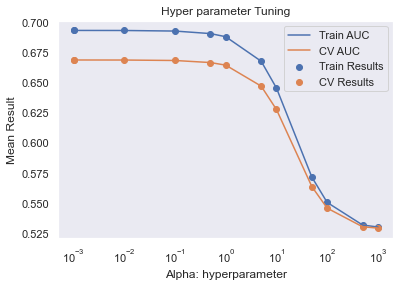

In [46]:
results, best_parameters = multi_nomial_NB(X_tr_tfidf_csr,y_tr)

In [47]:
print("{}{}".format(results['mean_test_score'],results['mean_train_score']))

0     0.668513
1     0.668513
2     0.668475
3     0.668091
4     0.666381
5     0.664233
6     0.646844
7     0.627481
8     0.563491
9     0.545706
10    0.530264
11    0.529165
Name: mean_test_score, dtype: float640     0.693010
1     0.693010
2     0.692962
3     0.692488
4     0.690396
5     0.687796
6     0.667479
7     0.645260
8     0.571372
9     0.550424
10    0.531707
11    0.530067
Name: mean_train_score, dtype: float64


In [48]:
alpha_tfidf = best_parameters['alpha']
alpha_tfidf

0.001

#### ROC-AUC Curve (TFIDF Implementation)

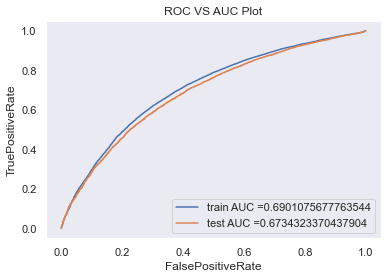

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import MultinomialNB

clf_mnb= MultinomialNB(alpha=alpha_tfidf)
clf_mnb.fit(X_tr_tfidf_csr,y_tr)


y_train_pred_tfidf = clf_mnb.predict_proba(X_tr_tfidf_csr)[::,1]   
y_test_pred_tfidf =  clf_mnb.predict_proba(X_test_tfidf_csr)[::,1]

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_tr, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)
auc_tfidf_train = auc(train_fpr_tfidf, train_tpr_tfidf)
auc_tfidf_test = auc(test_fpr_tfidf, test_tpr_tfidf)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc_tfidf_train))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc_tfidf_test))
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title("ROC VS AUC Plot")
plt.grid()
plt.show()

#### Confusion Matrix (TFIDF Implementation)

the maximum value of tpr*(1-fpr) 0.4345743914849477 for threshold 0.844


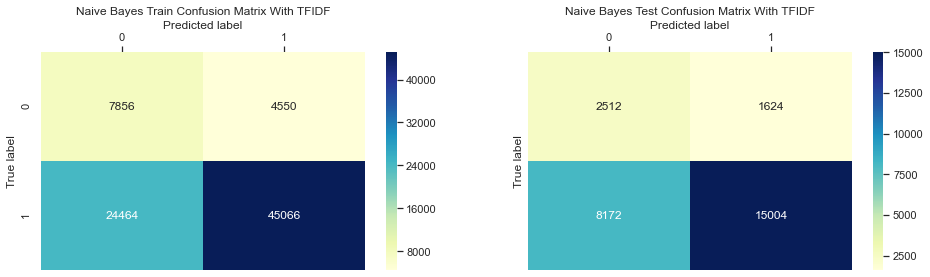

In [50]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
train_conf_mat = pd.DataFrame(confusion_matrix(y_tr, predict_with_best_t(y_train_pred_tfidf, best_t)))
test_conf_mat = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf, best_t)))

fig, axs = plt.subplots(1,2,figsize=(16, 4),sharey=True)
sns.set(font_scale=1)
f1 = sns.heatmap(train_conf_mat, annot=True,fmt="d", ax=axs[0], cmap= "YlGnBu") 

f1.set_title('Naive Bayes Train Confusion Matrix With TFIDF')
f1.set_ylabel('True label')
f1.set_xlabel('Predicted label')
f1.xaxis.set_ticks_position('top')
f1.xaxis.set_label_position('top')

f2 = sns.heatmap(test_conf_mat, annot=True, fmt = 'd', ax=axs[1] , cmap = "YlGnBu") 
f2.set_title('Naive Bayes Test Confusion Matrix With TFIDF')
f2.set_ylabel('True label')
f2.set_xlabel('Predicted label')
f2.xaxis.set_ticks_position('top')
f2.xaxis.set_label_position('top')

#### Top 20 feature for Positive and Negative Classes (BOW Implementation)

In [51]:
### Best Feature from BOW.
from itertools import chain 
TFIDF_features = (list(chain(BOW_feature_name,
                          state_feature_name,
                          pgc_feature_name,
                          tp_feature_name,
                          cln_cat_feature_name,
                          cln_sub_catg_feature_name,
                          ['Number Of Previously Posted Project',
                          'Price']
                          )))

print(TFIDF_features[5000:])

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy', 'grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2', 'dr', 'mr', 'mrs', 'ms', 'teacher', 'appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth', 'appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'so

In [52]:
pos_feature_with_log_proba, neg_feature_with_log_proba = fetch_important_feature(clf_mnb, TFIDF_features)

print("Top 20 Negative Class Features")
neg_feature_with_log_proba.head(20)

Top 20 Negative Class Features


,Feature_Name,Log_Probability
0,Price,-2.896150
1,Number Of Previously Posted Project,-2.896150
2,mrs,-3.582389
3,literacy_language,-3.758009
4,grades_prek_2,-3.793557
5,math_science,-3.820412
6,ms,-3.900743
7,grades_3_5,-4.025290
8,mathematics,-4.249306
9,literacy,-4.253369


In [53]:
print("Top 20 Positive Class Features")
pos_feature_with_log_proba.head(20)

Top 20 Positive Class Features


,Feature_Name,Log_Probability
0,Price,-2.907354
1,Number Of Previously Posted Project,-2.907354
2,mrs,-3.545382
3,literacy_language,-3.626789
4,grades_prek_2,-3.808195
5,math_science,-3.882132
6,ms,-3.944578
7,grades_3_5,-3.978167
8,literacy,-4.052178
9,mathematics,-4.263697


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [54]:
from prettytable import PrettyTable

comp_table = PrettyTable()
comp_table.field_names = ["Model Type","Vectorizer", "Hyper Parameter - alpha","Train-AUC","Test-AUC"]

comp_table.add_row(["Naive Bayes","BOW",alpha_tfidf,auc_bow_train,auc_bow_test])
comp_table.add_row([ "Naive Bayes", "TFIDF",alpha_tfidf,auc_tfidf_train,auc_tfidf_test])

print(comp_table)

+-------------+------------+-------------------------+--------------------+--------------------+
|  Model Type | Vectorizer | Hyper Parameter - alpha |     Train-AUC      |      Test-AUC      |
+-------------+------------+-------------------------+--------------------+--------------------+
| Naive Bayes |    BOW     |          0.001          | 0.7086099416410487 | 0.6920021885759897 |
| Naive Bayes |   TFIDF    |          0.001          | 0.6901075677763544 | 0.6734323370437904 |
+-------------+------------+-------------------------+--------------------+--------------------+


BOW model has performed marginally better than TF-IDF model. But feature for negative classes and positive grades are quire similar this mean that our model has not done very good job in differentiating both the classes. If top features would have been differenct we could use them to understand our model.  